In [1]:
#importing required modules

from Katna.video import Video
import timeit
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [2]:
#instantiating the video class

vd = Video()

In [3]:
# We will be analysing each video by generating 15, 10 and 5 keyframes each

frame_counts = [15,10,5]

In [4]:
# Creating a dataframe to store video duration, size and time taken for extracting 15, 10 and 5 frames from each video

df = pd.DataFrame(columns=('Duration','Size','Time for 15','Time for 10','Time for 5'))

# Video 1 

* Duration: 26 seconds
* Size: 59,88,173 bytes (7 MB on disk)

In [5]:
# Extracting keyframes for video 1 and appending data to the dataframe

data = {'Duration':26, 'Size':7}

i = 0
while (i<len(frame_counts)):
    start = timeit.default_timer()
    imgs = vd.extract_frames_as_images(no_of_frames = frame_counts[i], file_path= "./sample_videos/video1.mp4")
    stop = timeit.default_timer()
    print('Time taken to get',frame_counts[i],'keyframes: ', stop - start) 
    df_key = 'Time for ' + str(frame_counts[i])
    data[df_key] = stop - start
    
    # Make folder for saving frames
    output_folder_video_image = './key_frames/video1/'+str(frame_counts[i])+'frames'
    os.makedirs(output_folder_video_image)
    
    # Save all frames to disk
    for counter,img in enumerate(imgs):
        vd.save_frame_to_disk(img, file_path=output_folder_video_image, file_name="test_"+str(counter), file_ext=".jpeg")
    
    print("_______________________________________________________________________________________________________")
    i = i+1
    
df = df.append(data,ignore_index=True)

Time taken to get 15 keyframes:  5.593306912999999
_______________________________________________________________________________________________________
Time taken to get 10 keyframes:  4.482808451
_______________________________________________________________________________________________________
Time taken to get 5 keyframes:  4.305683577
_______________________________________________________________________________________________________


# Video 2 

* Duration: 57 seconds
* Size: 30,95,424 bytes (3.1 MB on disk)

In [6]:
# Extracting keyframes for video 2 and appending data to the dataframe

data = {'Duration':57, 'Size': 3.1}


i = 0
while (i<len(frame_counts)):
    start = timeit.default_timer()
    imgs = vd.extract_frames_as_images(no_of_frames = frame_counts[i], file_path= "./sample_videos/video2.mp4")
    stop = timeit.default_timer()
    print('Time taken to get',frame_counts[i],'keyframes: ', stop - start) 
    df_key = 'Time for ' + str(frame_counts[i])
    data[df_key] = stop - start
    
    # Make folder for saving frames
    output_folder_video_image = './key_frames/video2/'+str(frame_counts[i])+'frames'
    os.makedirs(output_folder_video_image)
    
    # Save all frames to disk
    for counter,img in enumerate(imgs):
        vd.save_frame_to_disk(img, file_path=output_folder_video_image, file_name="test_"+str(counter), file_ext=".jpeg")
        
    print("_______________________________________________________________________________________________________")
    i = i+1
    
df = df.append(data,ignore_index=True)

Time taken to get 15 keyframes:  4.305352217999996
_______________________________________________________________________________________________________
Time taken to get 10 keyframes:  3.302035228000001
_______________________________________________________________________________________________________
Time taken to get 5 keyframes:  3.424415964000005
_______________________________________________________________________________________________________


# Video 3

* Duration - 2min
* Size - 57,92,806 bytes (5.8 MB on disk)

In [8]:
# Extracting keyframes for video 3 and appending data to the dataframe

data = {'Duration':120, 'Size': 5.8}

i = 0
while (i<len(frame_counts)):
    start = timeit.default_timer()
    imgs = vd.extract_frames_as_images(no_of_frames = frame_counts[i], file_path= "./sample_videos/video3.mp4")
    stop = timeit.default_timer()
    print('Time taken to get',frame_counts[i],'keyframes: ', stop - start) 
    df_key = 'Time for ' + str(frame_counts[i])
    data[df_key] = stop - start
    
    # Make folder for saving frames
    output_folder_video_image = './key_frames/video3/'+str(frame_counts[i])+'frames'
    os.makedirs(output_folder_video_image)
    
    # Save all frames to disk
    for counter,img in enumerate(imgs):
        vd.save_frame_to_disk(img, file_path=output_folder_video_image, file_name="test_"+str(counter), file_ext=".jpeg")
    
    print("_______________________________________________________________________________________________________")
    i = i+1
    
df = df.append(data,ignore_index=True)

Time taken to get 15 keyframes:  3.4717050349999994
_______________________________________________________________________________________________________
Time taken to get 10 keyframes:  3.3916905429999957
_______________________________________________________________________________________________________
Time taken to get 5 keyframes:  3.232525891999998
_______________________________________________________________________________________________________


# Video 4

* Duration - 3min 47sec
* Size - 2,05,54,291 bytes (21 MB on disk)

In [9]:
# Extracting keyframes for video 4 and appending data to the dataframe

data = {'Duration':228, 'Size': 21}


i = 0
while (i<len(frame_counts)):
    start = timeit.default_timer()
    imgs = vd.extract_frames_as_images(no_of_frames = frame_counts[i], file_path= "./sample_videos/video4.mp4")
    stop = timeit.default_timer()
    print('Time taken to get',frame_counts[i],'keyframes: ', stop - start) 
    df_key = 'Time for ' + str(frame_counts[i])
    data[df_key] = stop - start
    
    # Make folder for saving frames
    output_folder_video_image = './key_frames/video4/'+str(frame_counts[i])+'frames'
    os.makedirs(output_folder_video_image)
    
    # Save all frames to disk
    for counter,img in enumerate(imgs):
        vd.save_frame_to_disk(img, file_path=output_folder_video_image, file_name="test_"+str(counter), file_ext=".jpeg")
    print("_______________________________________________________________________________________________________")
    i = i+1
    
df = df.append(data,ignore_index=True)

Time taken to get 15 keyframes:  13.741036403999985
_______________________________________________________________________________________________________
Time taken to get 10 keyframes:  12.432472953000001
_______________________________________________________________________________________________________
Time taken to get 5 keyframes:  12.544120386999992
_______________________________________________________________________________________________________


# Video 5

* Duration - 4min 51sec
* Size - 1,61,58,835 bytes (16.8 MB on disk)

In [10]:
# Extracting keyframes for video 5 and appending data to the dataframe

data = {'Duration':291, 'Size': 16.8}


i = 0
while (i<len(frame_counts)):
    start = timeit.default_timer()
    imgs = vd.extract_frames_as_images(no_of_frames = frame_counts[i], file_path= "./sample_videos/video5.mp4")
    stop = timeit.default_timer()
    print('Time taken to get',frame_counts[i],'keyframes: ', stop - start) 
    df_key = 'Time for ' + str(frame_counts[i])
    data[df_key] = stop - start
    
    # Make folder for saving frames
    output_folder_video_image = './key_frames/video5/'+str(frame_counts[i])+'frames'
    os.makedirs(output_folder_video_image)
    
    # Save all frames to disk
    for counter,img in enumerate(imgs):
        vd.save_frame_to_disk(img, file_path=output_folder_video_image, file_name="test_"+str(counter), file_ext=".jpeg")
    
    print("_______________________________________________________________________________________________________")
    i = i+1
    
df = df.append(data,ignore_index=True)

Time taken to get 15 keyframes:  15.791280942000014
_______________________________________________________________________________________________________
Time taken to get 10 keyframes:  14.254168378000003
_______________________________________________________________________________________________________
Time taken to get 5 keyframes:  14.249436499000012
_______________________________________________________________________________________________________


# Video 6

* Duration - 8min 14sec
* Size - 4,53,46,631 bytes (46.4 MB on disk)

In [11]:
# Extracting keyframes for video 6 and appending data to the dataframe

data = {'Duration':494, 'Size': 46.4}

i = 0
while (i<len(frame_counts)):
    start = timeit.default_timer()
    imgs = vd.extract_frames_as_images(no_of_frames = frame_counts[i], file_path= "./sample_videos/video6.mp4")
    stop = timeit.default_timer()
    print('Time taken to get',frame_counts[i],'keyframes: ', stop - start) 
    df_key = 'Time for ' + str(frame_counts[i])
    data[df_key] = stop - start
    
    # Make folder for saving frames
    output_folder_video_image = './key_frames/video6/'+str(frame_counts[i])+'frames'
    os.makedirs(output_folder_video_image)
    
    # Save all frames to disk
    for counter,img in enumerate(imgs):
        vd.save_frame_to_disk(img, file_path=output_folder_video_image, file_name="test_"+str(counter), file_ext=".jpeg")
    
    print("_______________________________________________________________________________________________________")
    i = i+1
    
    
df = df.append(data,ignore_index=True)

Time taken to get 15 keyframes:  24.55018881700005
_______________________________________________________________________________________________________
Time taken to get 10 keyframes:  27.70577579999997
_______________________________________________________________________________________________________
Time taken to get 5 keyframes:  28.455092030999992
_______________________________________________________________________________________________________


# Video 7

* Duration - 10min 50sec
* Size - 5,15,84,587 bytes (52.4 MB on disk)

In [12]:
# Extracting keyframes for video 7 and appending data to the dataframe

data = {'Duration':650, 'Size': 52.4}

i = 0
while (i<len(frame_counts)):
    start = timeit.default_timer()
    imgs = vd.extract_frames_as_images(no_of_frames = frame_counts[i], file_path= "./sample_videos/video7.mp4")
    stop = timeit.default_timer()
    print('Time taken to get',frame_counts[i],'keyframes: ', stop - start) 
    df_key = 'Time for ' + str(frame_counts[i])
    data[df_key] = stop - start
    
    # Make folder for saving frames
    output_folder_video_image = './key_frames/video_7/'+str(frame_counts[i])+'frames'
    os.makedirs(output_folder_video_image)
    
    # Save all frames to disk
    for counter,img in enumerate(imgs):
        vd.save_frame_to_disk(img, file_path=output_folder_video_image, file_name="test_"+str(counter), file_ext=".jpeg")
    
    print("_______________________________________________________________________________________________________")
    i = i+1
    
    
df = df.append(data,ignore_index=True)

Time taken to get 15 keyframes:  46.99697968200002
_______________________________________________________________________________________________________
Time taken to get 10 keyframes:  49.77352117299995
_______________________________________________________________________________________________________
Time taken to get 5 keyframes:  49.550673793000044
_______________________________________________________________________________________________________


# Result Analysis:  

In [13]:
print("_______________________________________________________________________________________________________")
print (df)
print("_______________________________________________________________________________________________________")

_______________________________________________________________________________________________________
   Duration  Size  Time for 15  Time for 10  Time for 5
0      26.0   7.0     5.593307     4.482808    4.305684
1      57.0   3.1     4.305352     3.302035    3.424416
2     120.0   5.8     3.471705     3.391691    3.232526
3     228.0  21.0    13.741036    12.432473   12.544120
4     291.0  16.8    15.791281    14.254168   14.249436
5     494.0  46.4    24.550189    27.705776   28.455092
6     650.0  52.4    46.996980    49.773521   49.550674
_______________________________________________________________________________________________________


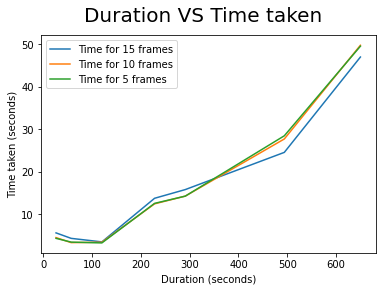

In [14]:
# plotting duration vs time

plt.plot(df['Duration'],df['Time for 15'])
plt.plot(df['Duration'],df['Time for 10'])
plt.plot(df['Duration'],df['Time for 5'])

plt.legend(['Time for 15 frames', 'Time for 10 frames', 'Time for 5 frames'], loc='upper left')
plt.xlabel('Duration (seconds)')
plt.ylabel('Time taken (seconds)')
plt.suptitle('Duration VS Time taken', fontsize=20)

plt.show()

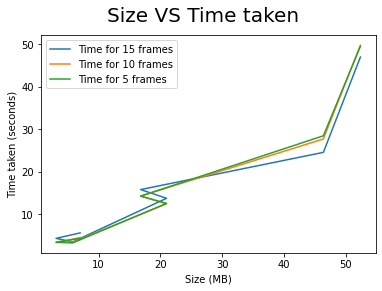

In [15]:
# plotting size vs time

plt.plot(df['Size'],df['Time for 15'])
plt.plot(df['Size'],df['Time for 10'])
plt.plot(df['Size'],df['Time for 5'])

plt.legend(['Time for 15 frames', 'Time for 10 frames', 'Time for 5 frames'], loc='upper left')
plt.xlabel('Size (MB)')
plt.ylabel('Time taken (seconds)')
plt.suptitle('Size VS Time taken', fontsize=20)

plt.show()